# **Restaurant's Cuisine Ratings - EDA**

In [1]:
import pandas as pd
df= pd.read_csv("/kaggle/input/cuisine-rating/Cuisine_rating.csv")
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [3]:
df.duplicated().sum()

0

In [4]:
df = df.rename(columns = {"Often A S":"Often Visits"})
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often Visits
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


## Data Analysis :

### 1.Different types of cuisines preferred by customers in the restaurant.

In [5]:
cuisines = pd.DataFrame(df["Cuisines"].value_counts()).reset_index()
cuisines

,Cuisines,count
0,Japanese,36
1,Filipino,34
2,French,34
3,Indian,32
4,Chinese,24
5,Seafood,22
6,Italian,18


Text(0.5, 1.0, 'Cuisines Preferred by Customers')

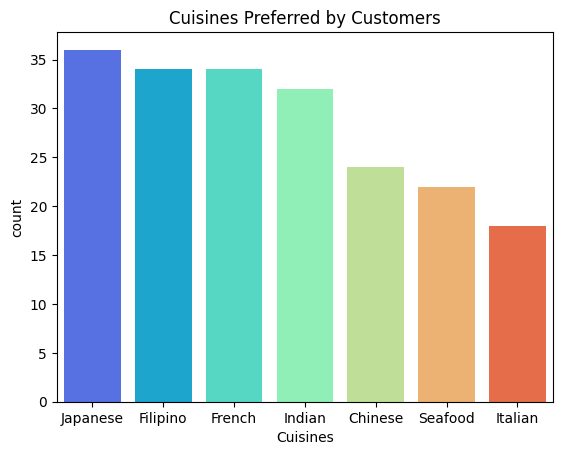

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=cuisines["Cuisines"],y=cuisines["count"],palette="rainbow")
plt.title("Cuisines Preferred by Customers")

#### Most people prefers Japenee cuisine and least prefers Italian cuisine. Filipino , French and Indian cuisines are also well known among customers.

### 2.Gender and Martial status of the customers.

In [7]:
df["Gender"].value_counts()

Gender
Male      118
Female     82
Name: count, dtype: int64

In [8]:
 df["Marital Status"].value_counts()


Marital Status
Single      100
Married      86
Divorced     14
Name: count, dtype: int64

In [9]:
# Cross tab in pandas can be used to analyse two variables as here :
g_ms = pd.crosstab(df["Gender"],df["Marital Status"])
g_ms

Marital Status,Divorced,Married,Single
Gender,,,
Female,6,36,40
Male,8,50,60


Text(50.722222222222214, 0.5, 'Number of Customers')

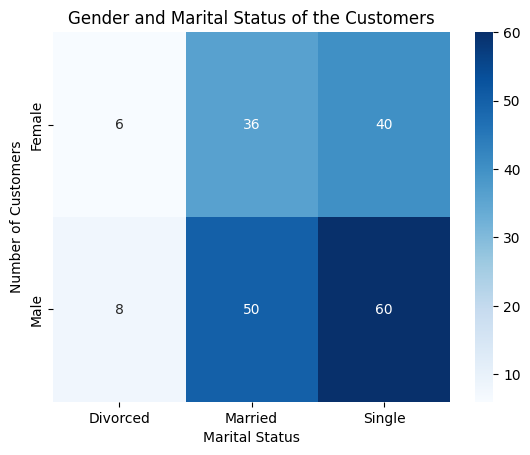

In [10]:
sns.heatmap(g_ms,annot=True,cmap="Blues")
plt.title("Gender and Marital Status of the Customers")
plt.ylabel("Number of Customers")

#### Single males are the most visited customers , then comes married male customers. Most customers are males in all the categories compared to that of females.

### 3. Food rating by customers for various cuisines.

In [11]:
food_r_c = df.groupby("Cuisines")["Food Rating"].mean()
food_r_c

Cuisines
Chinese     3.458333
Filipino    2.705882
French      3.294118
Indian      2.781250
Italian     3.222222
Japanese    3.861111
Seafood     3.227273
Name: Food Rating, dtype: float64

In [12]:
food_ratings = pd.DataFrame(food_r_c).sort_values("Food Rating",ascending=False).reset_index()
food_ratings

,Cuisines,Food Rating
0,Japanese,3.861111
1,Chinese,3.458333
2,French,3.294118
3,Seafood,3.227273
4,Italian,3.222222
5,Indian,2.781250
6,Filipino,2.705882


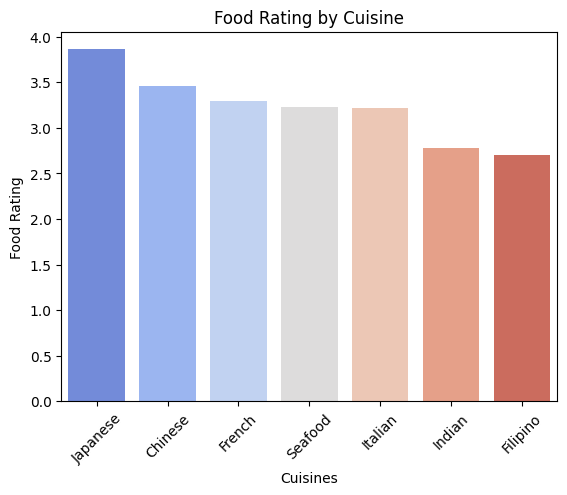

In [13]:
sns.barplot(food_ratings,x="Cuisines",y="Food Rating",palette="coolwarm")
plt.title('Food Rating by Cuisine')
plt.ylabel('Food Rating')
plt.xlabel('Cuisines')
plt.xticks(rotation=45)
plt.show()

#### Japenese cuisine has the highest rating bout 3.8 . Then comes Chinese ,French,Sea Food,Korean with food rating between 3 and 3.5. Filippino cuisine has the least rating with 2.7

### 4. Areas where customers coming from. 

In [15]:
Location= df["Location"].value_counts()
Location =pd.DataFrame(Location).reset_index()
Location

,Location,count
0,"St. George,NY",46
1,"Upper East Side,NY",30
2,"Riverdale,NY",28
3,"Central Park,NY",24
4,"China Town, NY",22
5,"Market City, NY",20
6,"Upper West Side,NY",18
7,"Central Park,ny",8
8,"Market City, MY",2
9,"Cedar Hill, NY",2


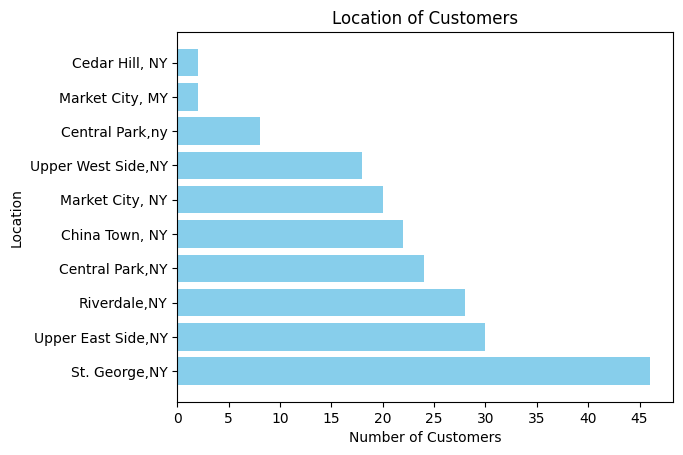

In [16]:
import numpy as np
plt.barh(y=Location["Location"],width=Location["count"],color="skyblue")
plt.title("Location of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Location")
plt.xticks(np.arange(0,50,5))
plt.show()

####  Most of the customers are from St.George,New York and least from Cedar Hill and Market City with 2 customers.



### 5. Overall Rating By Customers

In [ ]:
df["Overall Rating"].value_counts()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Overall Rating by Customers')

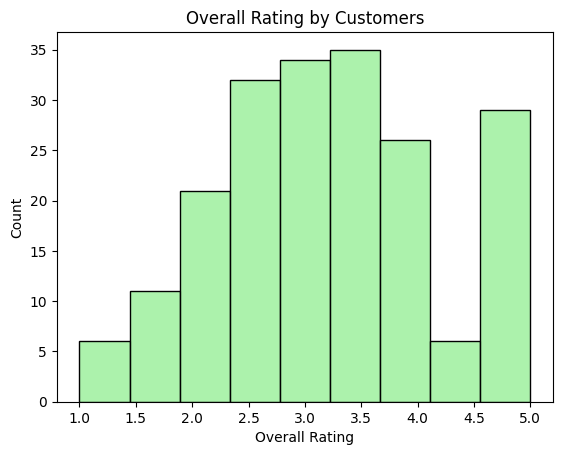

In [38]:
sns.histplot(df["Overall Rating"],color="lightgreen")
plt.title("Overall Rating by Customers")

#### 3.5 rating has been given by 35 customers .Another 30 plus customers have given 3 and 2.5 rating. About 29 customers gave 5 rating. 6 customers have given 1 rating too.

### 6. Age distribution of customers.

In [18]:
from datetime import datetime
df["Age"]= (datetime.now().year-df["YOB"])
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often Visits,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,18
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,33
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,47
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,68
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,42
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,24
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,18
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,22


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


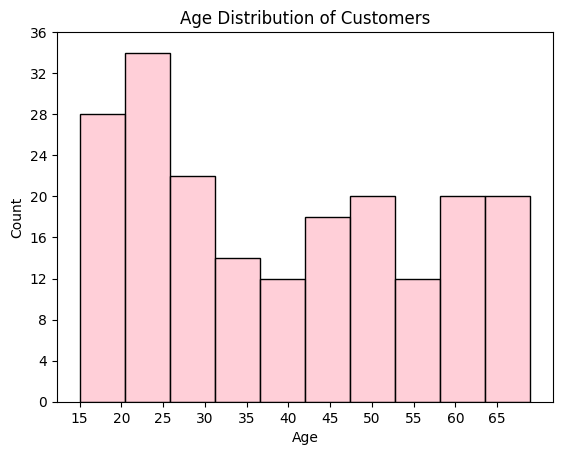

In [41]:
sns.histplot(df["Age"],bins=10,color="pink")
plt.xticks(np.arange(15,70,5))
plt.yticks(np.arange(0,40,4))
plt.title("Age Distribution of Customers")
plt.show()

#### About 34 customers are of age 20-25 and 28 customers belongs to age group 15-20 . Also restaurant have customers from all age group.

### 7. Customers who visit often.

In [48]:
ov=pd.DataFrame(df["Often Visits"].value_counts()).reset_index()
ov

,Often Visits,count
0,No,174
1,Yes,26


<Axes: xlabel='Often Visits', ylabel='count'>

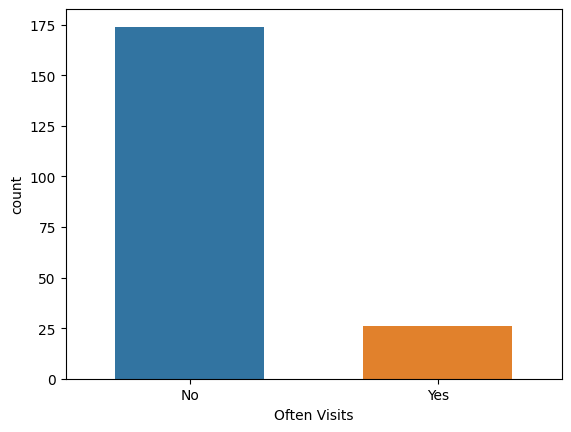

In [56]:
sns.barplot(ov,x="Often Visits",y="count",width=0.6)

#### Only about 26 customers often visit  among the 200. 

### 8. Budget of Customers


In [59]:
budget=pd.DataFrame(df["Budget"].value_counts()).reset_index()
budget

,Budget,count
0,4,63
1,5,62
2,3,61
3,1,10
4,2,4


Text(0.5, 1.0, 'Budget of Customers')

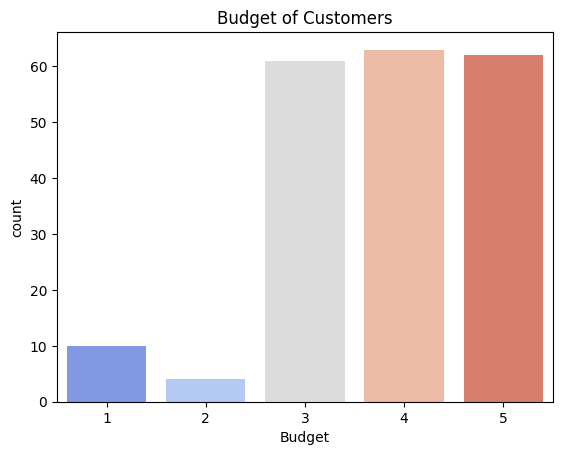

In [83]:
sns.barplot(budget,x="Budget",y="count",palette="coolwarm")
plt.title("Budget of Customers")

#### It is clear that customers are ready to spent money on food . More than 180 customers have budget 3 or more.

Smoker
Socially    71
Often       70
Never       59
Name: count, dtype: int64

In [96]:
df[

Activity
Student         120
Professional     80
Name: count, dtype: int64